####  OBJETIVO A TREINAMENTO DE DADOS E ENCONTRAR VALORES SIMILARES AO DA AMOSTRA

#### Importando Bibliotecas

In [12]:
!pip install scikit-learn

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

#### SOBRE O DATA SET

###### Imagine que um provedor de telecomunicações segmentou sua base de clientes por padrões de uso de serviços, categorizando os clientes em quatro grupos. Se os dados demográficos puderem ser usados para prever a associação ao grupo, a empresa poderá personalizar ofertas para clientes potenciais individuais. É um problema de classificação. Ou seja, dado o conjunto de dados, com rótulos predefinidos, precisamos construir um modelo a ser usado para prever a classe de um caso novo ou desconhecido.O exemplo se concentra no uso de dados demográficos, como região

#### BAIXANDO OS DADOS:

In [17]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


<div id="Visualização e Análise">
    <h2>Visualização e Analise dos Dados</h2> 
</div>

###### Classes e Quantidade por Classe

In [20]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

###### 281 Serviço Plus, 266 Serviço Básico, 236 Serviço Total , e 217 Serviço Customizado

###### Visualizando com o Histograma

array([[<Axes: title={'center': 'income'}>]], dtype=object)

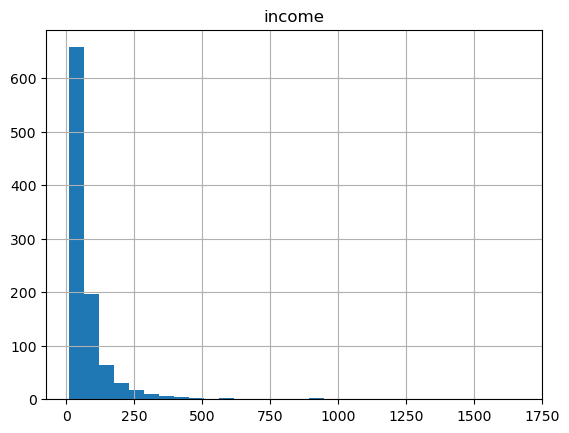

In [23]:
df.hist(column = 'income',bins = 30)

#### Conjunto de Recursos

###### Definindo conjuntos de recursos'X'

In [27]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [30]:
x=df[['region','tenure','age','marital','address','income','ed','employ','retire','gender','reside']].values # ajustar.astype(float)
x[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

#### Verificando os Rótulos

In [32]:
y=df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

#### Normalizando Dados

###### A padronização de dados dá aos dados zero média e variância unitária, é uma boa prática, especialmente para algoritmos como o KNN que se baseia na distância dos pontos de dados:

In [34]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

#### Train Test Split

###### Fora da Precisão da Amostra é a porcentagem de previsões corretas que o modelo faz em dados nos quais o modelo NÃO foi treinado. Fazer um treinamento e um teste no mesmo conjunto de dados provavelmente terá baixa precisão fora da amostra, devido à probabilidade de nosso modelo se sobreajustar.É importante que nossos modelos tenham uma precisão alta e fora da amostra, porque o objetivo de qualquer modelo, é claro, é fazer previsões corretas em dados desconhecidos. Então, como podemos melhorar a precisão fora da amostra? Uma maneira é usar

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=4)
print ('Set Treino: ',x_train.shape, y_train.shape)
print ('Set Teste: ', x_test.shape, y_test.shape)

Set Treino:  (800, 11) (800,)
Set Teste:  (200, 11) (200,)


#### Classificação

###### Implementando a Classificação Kneighbors

In [39]:
from sklearn.neighbors import KNeighborsClassifier

#### Treinando

###### Testar com k=4

In [44]:
k=4
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

#### Previsão

Vamos fazer previsões utilizando o modelo 

In [47]:
yhat= neigh.predict(x_test)
yhat [0:5]

array([1, 1, 3, 2, 4], dtype=int64)

### Avaliação da acurácia

Na classificação multilabel, **pontuação de classificação de precisão** é uma função que calcula a precisão do subconjunto. Esta função é igual à função jaccard_score. Essencialmente, ele calcula o quanto os rótulos reais e os rótulos previstos são correspondidos no conjunto de teste.


In [48]:
from sklearn import metrics
print("Set Acurácia Treino: ",metrics.accuracy_score(y_train,neigh.predict(x_train)))
print("Set Acurácia Teste: ", metrics.accuracy_score(y_test,yhat))

Set Acurácia Treino:  0.5475
Set Acurácia Teste:  0.32


In [49]:
#### outro teste de previsão com k=6

In [50]:
k=6
neigh6=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)
yhat6=neigh6.predict(x_test)
print("Set Acurácia Treino: ",metrics.accuracy_score(y_train, neigh6.predict(x_train)))
print("Set Acurácia Teste: ",metrics.accuracy_score(y_test,yhat6))

Set Acurácia Treino:  0.51625
Set Acurácia Teste:  0.31


#### E os outros K?

K em KNN, é o número de vizinhos mais próximos a examinar. Ele deve ser especificado pelo usuário. Então, como podemos escolher o valor certo para K?
A solução geral é reservar uma parte de seus dados para testar a precisão do modelo. Em seguida, escolha k =1, use a parte de treinamento para modelagem e calcule a precisão da previsão usando todas as amostras em seu conjunto de teste. Repita esse processo, aumentando o k, e veja qual k é o melhor para o seu modelo.

Podemos calcular a precisão de KNN para diferentes valores de k.

In [54]:
Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks -1))

for n in range (1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train, y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

In [55]:
#### Plotando o modelo

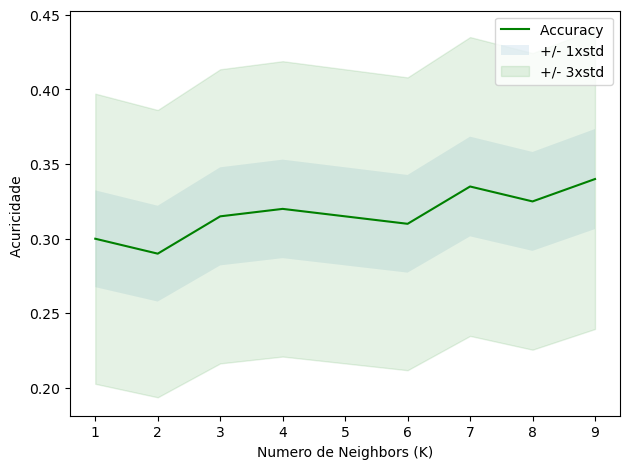

In [57]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Acuricidade ')
plt.xlabel('Numero de Neighbors (K)')
plt.tight_layout()
plt.show()

In [59]:
print( "A melhor acuricidade foi de", mean_acc.max(), "com k=", mean_acc.argmax()+1) 

A melhor acuricidade foi de 0.34 com k= 9


#### Perfil Profissional

<p style="text-align:center">
    <a href="https://www.linkedin.com/in/antoniocmmachado/">
<img src="https://onedrive.live.com/embed?resid=F14527FE21AE4226%213575&authkey=%21AFPf4ZeZfF33KJ8&width=256" whidth=5 alt= "Antonio"/>
    </a>
</p>


<p style="text-align:center"> 

                                                      Conheça mais sobre o Autor

Sou Antonio Carlos Mariano Machado, um analista BI cursando MBA em Tecnologia para Negócios pela PUC-RS. Tenho experiência em liderar projetos de implantação do setor de BI, desenvolver relatórios em Dashboards no Power BI e analisar dados em SQL. As minhas competências principais são Data Analysis, Microsoft Power BI e Team Leadership.
No meu último trabalho, fui responsável pelo projeto de BI do grupo JCE, uma empresa de engenharia e construção. Colaborei com as áreas de negócios, financeira e operacional para entender as suas necessidades, definir os indicadores e criar as soluções de BI. Utilizei o Power BI para desenvolver relatórios interativos e dinâmicos que facilitaram a tomada de decisão e a gestão de performance. Também utilizei o SQL para extrair, transformar e carregar os dados de diferentes fontes e criar views otimizadas. Graças ao meu trabalho, o grupo JCE conseguiu aumentar a sua eficiência, reduzir os seus custos e melhorar a sua competitividade no mercado. O meu objetivo é continuar a aprender e a aplicar as melhores práticas de BI, contribuindo para o crescimento e a inovação das organizações. Acredito que posso trazer uma perspectiva diversa e uma experiência valiosa para a equie. </p>.